**Comando para evitar mensagens de Warning**

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

**Caso não tenha instalado no seu Google Colab ou no seu Anaconda**

In [2]:
# caso você não tem essa biblioteca instalada use o comando abaixo.
!pip install imblearn

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import seaborn as sns

### **Modelo com classes desbalanceadas**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('bank-full.csv', sep=';')
#df = pd.read_csv('/content/drive/My Drive/Lidando com Dados Desbalanceados/bank-full.csv', sep=';')

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Formatando algumas colunas**

In [8]:
df["default"] = df["default"].map({"no":0,"yes":1})
df["housing"] = df["housing"].map({"no":0,"yes":1})
df["loan"] = df["loan"].map({"no":0,"yes":1})
df["y"] = df["y"].map({"no":0,"yes":1})
df.education = df.education.map({"primary": 0, "secondary":1, "tertiary":2})
df.poutcome = df.poutcome.map({"unknown": 0, "failure":1, "other":2, "success":3})
df.contact = df.contact.map({"cellular": 0, "unknown":1, "telephone":2})
df.month = pd.to_datetime(df.month, format = "%b").dt.month

**Checando missing values**

In [9]:
df.isnull().sum()

age             0
job             0
marital         0
education    1857
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
y               0
dtype: int64

**Removendo missing values**

In [10]:
df.dropna(inplace = True)

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,2.0,0,2143,1,0,1,5,5,261,1,-1,0,0,0
1,44,technician,single,1.0,0,29,1,0,1,5,5,151,1,-1,0,0,0
2,33,entrepreneur,married,1.0,0,2,1,1,1,5,5,76,1,-1,0,0,0
5,35,management,married,2.0,0,231,1,0,1,5,5,139,1,-1,0,0,0
6,28,management,single,2.0,0,447,1,1,1,5,5,217,1,-1,0,0,0


**Transformando colunas categóricas em numéricas**

In [12]:
df = pd.get_dummies(df)

In [13]:
df.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,2.0,0,2143,1,0,1,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,1.0,0,29,1,0,1,5,5,151,...,0,0,0,0,1,0,0,0,0,1
2,33,1.0,0,2,1,1,1,5,5,76,...,0,0,0,0,0,0,0,0,1,0
5,35,2.0,0,231,1,0,1,5,5,139,...,0,0,0,0,0,0,0,0,1,0
6,28,2.0,0,447,1,1,1,5,5,217,...,0,0,0,0,0,0,0,0,0,1


**Visualizando a distribuição das classes**

In [14]:
df.y.value_counts()

0    38317
1     5037
Name: y, dtype: int64

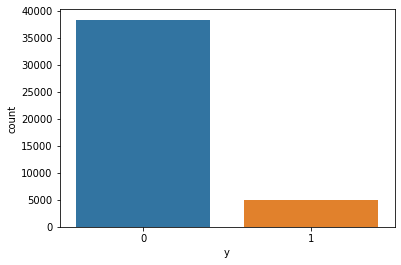

In [15]:
import seaborn as sns
ax = sns.countplot(x="y", data=df)

**Executando um Algoritmo Classificador**

In [16]:
lr = LogisticRegression()

**Separa dados e suas classes**

In [17]:
X = df.drop("y", axis = 1)
y = df.y

**Separa dados de treino e teste**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

**Treina o algoritmo**

In [19]:
lr.fit(X_train, y_train)

C:\Users\Fabiana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Coloca as classificações na variável y_pred**

In [20]:
y_pred = lr.predict(X_test)

**Checa a acurácia do modelo**

In [21]:
accuracy_score(y_test, y_pred)

0.8941784297444414

**Relatório de Classificação**

- *Observe o Recall*




In [22]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9580
           1       0.62      0.23      0.34      1259

    accuracy                           0.89     10839
   macro avg       0.76      0.61      0.64     10839
weighted avg       0.87      0.89      0.87     10839



**Matriz de confusão**

In [23]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    1    All
Real                      
0         9397  183   9580
1          964  295   1259
All      10361  478  10839


### **Aplicando NearMiss:**

*   Método de Undersampling.
*   Iguala as quantidade de amostras entre as classes.



In [24]:
from imblearn.under_sampling import NearMiss

**Instancia o NearMiss**

In [25]:
nr = NearMiss()

**Aplica o NearMiss**



*   Aplica o NearMiss nos dados para igualar a quantidade de amostras das classes



In [26]:
X, y = nr.fit_sample(X, y)

**Checa a quantidade de amostras entre as classes**

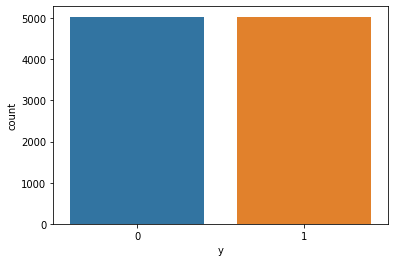

In [27]:
ax = sns.countplot(x=y)



*   Separa em 70% dos dados para treino e 30% para teste.




In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

**Instância o classificador**

In [29]:
lr = LogisticRegression()

**Treina o algoritmo**

In [30]:
lr.fit(X_train, y_train)

C:\Users\Fabiana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Coloca as classificações na variável y_pred**

In [31]:
y_pred = lr.predict(X_test)

**Checa a acurácia do modelo**

In [32]:
accuracy_score(y_test, y_pred)

0.8725684795553791

*Recall*

In [33]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1259
           1       0.89      0.85      0.87      1260

    accuracy                           0.87      2519
   macro avg       0.87      0.87      0.87      2519
weighted avg       0.87      0.87      0.87      2519



**Matriz de confusão**

In [34]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1130   129  1259
1         192  1068  1260
All      1322  1197  2519


### **Aplicando o SMOTE (Synthetic Minority Over-sampling Technique)**



*   Gera dados sintéticos da classe minoritária.



**Separa os dados e as classes**

*Aqui vamos repetir esse passo, pois, no teste do NearMiss a gente substituiu os dados das varíaveis X e y*

In [35]:
X = df.drop("y", axis = 1)
y = df.y

**Visualizando a quantidade de dados por classe**

In [36]:
np.bincount(y)

array([38317,  5037], dtype=int64)

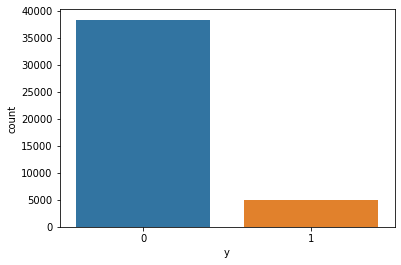

In [37]:
ax = sns.countplot(x=y)

**Instância o SMOTE**

In [42]:
# sampling_strategy=0.5
smt = SMOTE()

**Aplica o SMOTE nos dados**

In [43]:
X, y = smt.fit_sample(X, y)

**Visualizando a distribuição das amostras**

In [44]:
np.bincount(y)

array([38317, 38317], dtype=int64)

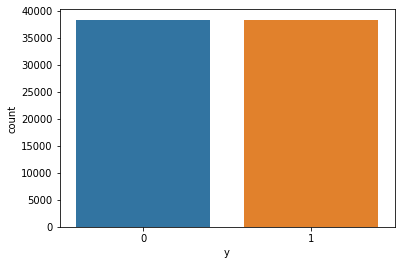

In [45]:
ax = sns.countplot(x=y)

**Separando Treino e Teste**



*   Separa em 70% dos dados para treino e 30% para teste.




In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

**Instância o classificador**

In [47]:
lr = LogisticRegression()

**Treina o algoritmo**

In [48]:
lr.fit(X_train, y_train)

C:\Users\Fabiana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Coloca as classificações na variável y_pred**

In [49]:
y_pred = lr.predict(X_test)

**Checa a acurácia do modelo**

In [50]:
accuracy_score(y_test, y_pred)

0.8724881256850566

*Recall*

In [51]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      9579
           1       0.86      0.89      0.87      9580

    accuracy                           0.87     19159
   macro avg       0.87      0.87      0.87     19159
weighted avg       0.87      0.87      0.87     19159



**Matriz de Confusão**

In [52]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1    All
Real                      
0        8187  1392   9579
1        1051  8529   9580
All      9238  9921  19159
